## Read data

In [1]:
with open('names.txt') as f:
    words = f.read().split()

print(words[:10])
print(len(words), max(len(w) for w in words), min(len(w) for w in words))


['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
32033 15 2


## Bigram

### Bigram simple

In [2]:
from collections import Counter
from pprint import pprint

pair_counter = Counter()  # a bigram

for w in words:
    chs = ['^'] + list(w) + ['$']
    pair_counter.update(zip(chs, chs[1:]))

pprint(pair_counter)


Counter({('n', '$'): 6763,
         ('a', '$'): 6640,
         ('a', 'n'): 5438,
         ('^', 'a'): 4410,
         ('e', '$'): 3983,
         ('a', 'r'): 3264,
         ('e', 'l'): 3248,
         ('r', 'i'): 3033,
         ('n', 'a'): 2977,
         ('^', 'k'): 2963,
         ('l', 'e'): 2921,
         ('e', 'n'): 2675,
         ('l', 'a'): 2623,
         ('m', 'a'): 2590,
         ('^', 'm'): 2538,
         ('a', 'l'): 2528,
         ('i', '$'): 2489,
         ('l', 'i'): 2480,
         ('i', 'a'): 2445,
         ('^', 'j'): 2422,
         ('o', 'n'): 2411,
         ('h', '$'): 2409,
         ('r', 'a'): 2356,
         ('a', 'h'): 2332,
         ('h', 'a'): 2244,
         ('y', 'a'): 2143,
         ('i', 'n'): 2126,
         ('^', 's'): 2055,
         ('a', 'y'): 2050,
         ('y', '$'): 2007,
         ('e', 'r'): 1958,
         ('n', 'n'): 1906,
         ('y', 'n'): 1826,
         ('k', 'a'): 1731,
         ('n', 'i'): 1725,
         ('r', 'e'): 1697,
         ('^', 'd'): 1690,
 

In [39]:
import random
from collections import defaultdict

# Map from a character to all possible next characters
next_char_dict = defaultdict(list)
for pair, cnt in pair_counter.items():
    # Duplicating the next character to mimic a uniform distribution
    next_chars = [pair[1]] * cnt
    next_char_dict[pair[0]].extend(next_chars)

random.seed(42)

for _ in range(10):
    gen = ['^']
    while gen[-1] != '$':
        gen.append(random.choice(next_char_dict[gen[-1]]))
    print(''.join(gen[1:-1]))


belerie
keel
hia
styn
ksieyirle
kanarin
ahanoma
kh
ahiromickele
wa


### Bigram with pytorch


In [3]:
import torch

In [117]:
def make_alphabet(words: list[str]) -> list[str]:
    chars = {'.'}
    for w in words:
        chars |= set(w)

    chars = sorted(chars)
    print(chars)
    return chars


alphabet = make_alphabet(words)
ch2i = {char: i for i, char in enumerate(alphabet)}
i2ch = dict(enumerate(alphabet))

N = torch.zeros((len(alphabet), len(alphabet)), dtype=torch.int32)
for w in words:
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        ix1 = ch2i[ch1]
        ix2 = ch2i[ch2]
        N[ix1, ix2] += 1


['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


(-0.5, 26.5, 26.5, -0.5)

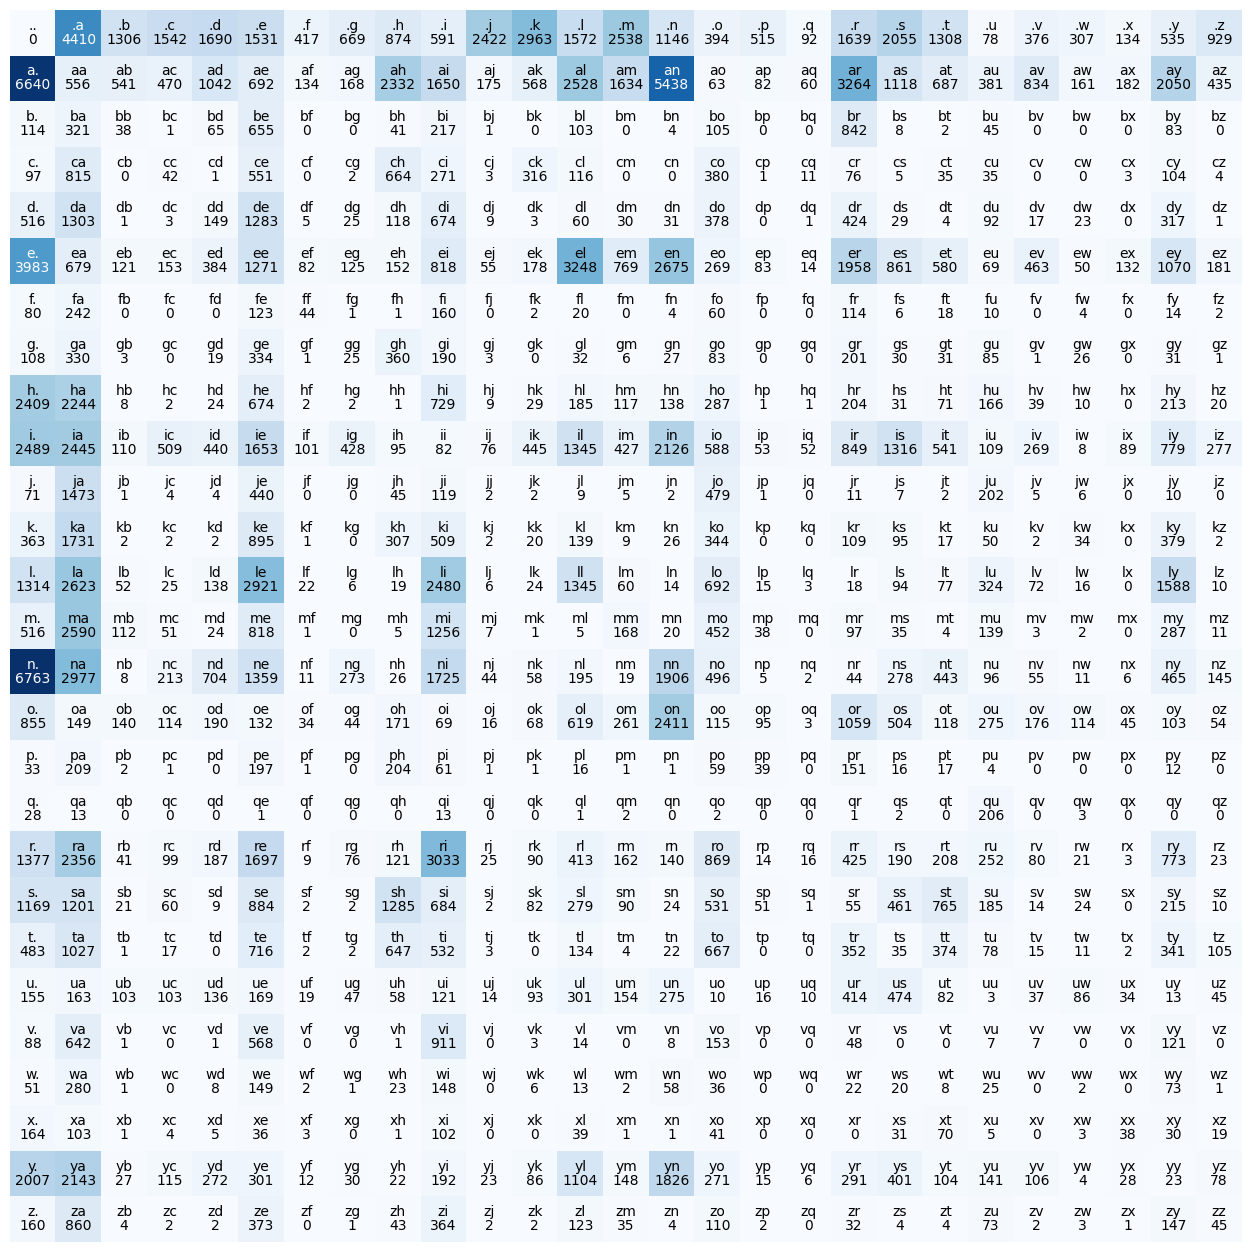

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
max_freq = torch.max(N)
for i in range(N.shape[0]):
    for j in range(N.shape[1]):
        char = i2ch[i] + i2ch[j]
        freq = N[i, j].item()
        color = 'black' if freq < max_freq / 2 else 'white'
        plt.text(j, i, char, ha='center', va='bottom', color=color)
        plt.text(j, i, freq, ha='center', va='top', color=color)
plt.axis('off')


In [37]:
p = N[0].float()
p = p / p.sum()
p


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [93]:
N.sum(dim=0, keepdim=True).shape

torch.Size([1, 27])

In [92]:
N.sum(dim=1, keepdim=True).shape

torch.Size([27, 1])

In [106]:
# A new matrix defining probabilities it's a next char
N += 1
P = N.float() / N.sum(dim=1, keepdim=True)
P

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [110]:
LEN_LIM = 100
NUM_WORDS = 20

g = torch.Generator().manual_seed(42)

def wtos(ixs: list[int]) -> str:
    return ''.join(i2ch[ix] for ix in ixs)


for _ in range(NUM_WORDS):
    word: list[int] = []
    ix = 0
    for _ in range(LEN_LIM):
        ix = torch.multinomial(
            P[ix], num_samples=1, replacement=True, generator=g
        ).item()
        if ix == 0:
            break
        word.append(ix)
    else:
        print(f'Word exceeded length limit {LEN_LIM}: {wtos(word)}')

    print(wtos(word))


a
a
keys
a
hmone
mif
mah
ay
dadabenes
ely
jayna
mena
lezain
an
makhopamya
m
kh
enan
tyan
ayn


### Evaluate the model

Goal: maximise likelihood of the data wrt model parameters (statistical modelling).
Equivalent to maximizing the log likelihood (because log is monotonic)
Equivalent to minimising the negative log likelihood
Equivalent to minimising the average negative log likelihood

In [145]:
log_likelihood = 0.0
n = 0

for w in ['andrej']:
    chars = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chars, chars[1:]):
        ix1 = ch2i[ch1]
        ix2 = ch2i[ch2]
        p = P[ix1, ix2]
        log_p = torch.log(p)
        log_likelihood += log_p
        print(f'{ch1}{ch2}: {p:.4f} {log_p:.4f}')
        n += 1

print(f'{log_likelihood=}')
avg_log_likelihood = log_likelihood / n
print(f'{avg_log_likelihood=}')
nnl = -avg_log_likelihood
print(f'{nnl=}')


.a: 0.1376 -1.9835
an: 0.1604 -1.8302
nd: 0.0384 -3.2594
dr: 0.0770 -2.5646
re: 0.1334 -2.0143
ej: 0.0027 -5.9004
j.: 0.0246 -3.7051
log_likelihood=tensor(-21.2574)
avg_log_likelihood=tensor(-3.0368)
nnl=tensor(3.0368)


## Neural network approach


Create the training set of bigrams


In [112]:
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ch2i[ch1]
        ix2 = ch2i[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs, ys)


. e
e m
m m
m a
a .
tensor([ 0,  5, 13, 13,  1]) tensor([ 5, 13, 13,  1,  0])


27 tensor([ 0,  5, 13, 13,  1])


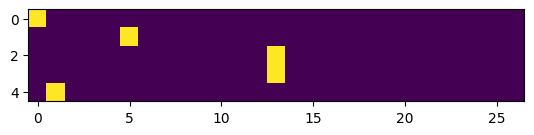

In [141]:
import torch.nn.functional as F
print(len(alphabet), xs)
x_enc = F.one_hot(xs, num_classes=len(alphabet)).float()
plt.imshow(x_enc)


In [127]:
x_enc.shape, x_enc.dtype


(torch.Size([5, 27]), torch.float32)

In [198]:
g = torch.Generator().manual_seed(42)
# randomly initialize 27 neuron's weights. each neuron receives 27 inputs
size = (len(alphabet), len(alphabet))
W = torch.randn(size, generator=g, requires_grad=True)
W.shape

torch.Size([27, 27])

In [207]:
# forward pass
logits = x_enc @ W  # log-counts (logits)
counts = (x_enc @ W).exp()  # equivalent N
probs = counts / counts.sum(dim=1, keepdims=True)
probs.shape

torch.Size([5, 27])

In [170]:
# slow version of loss calculation
nlls = torch.zeros(len(xs))
for i in range(len(xs)):
    x = xs[i].item()
    y = ys[i].item()
    print(f'bigram example {i+1}: {i2ch[x]}{i2ch[y]} (indices {x}, {y})')
    print('input to the nn:', x)
    print('output probs from the nn:', probs[i])
    p = probs[i, y]
    print('prob assigned by the net to the correct char:', p)
    log_p = torch.log(p)
    print('log likelihood:', log_p.item())
    nll = -log_p
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

loss = nlls.mean().item()
print('Loss (average nll):', loss)

bigram example 1: .e (indices 0, 5)
input to the nn: 0
output probs from the nn: tensor([0.0139, 0.0112, 0.1169, 0.1068, 0.0120, 0.0076, 0.0100, 0.0541, 0.0080,
        0.1474, 0.0119, 0.1033, 0.0164, 0.0133, 0.0862, 0.0121, 0.0835, 0.0211,
        0.0055, 0.0068, 0.0101, 0.0235, 0.0197, 0.0444, 0.0164, 0.0088, 0.0290],
       grad_fn=<SelectBackward0>)
prob assigned by the net to the correct char: tensor(0.0076, grad_fn=<SelectBackward0>)
log likelihood: -4.882194995880127
negative log likelihood: 4.882194995880127
bigram example 2: em (indices 5, 13)
input to the nn: 5
output probs from the nn: tensor([0.0110, 0.0535, 0.0204, 0.0200, 0.0605, 0.1719, 0.0042, 0.0323, 0.0109,
        0.0475, 0.0812, 0.0156, 0.0237, 0.0255, 0.0722, 0.0137, 0.0384, 0.0512,
        0.0945, 0.0382, 0.0075, 0.0094, 0.0228, 0.0108, 0.0190, 0.0316, 0.0125],
       grad_fn=<SelectBackward0>)
prob assigned by the net to the correct char: tensor(0.0255, grad_fn=<SelectBackward0>)
log likelihood: -3.66857337951660

In [160]:
probs.shape, probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(torch.Size([5, 27]),
 tensor(0.0486),
 tensor(0.0055),
 tensor(0.0097),
 tensor(0.0128),
 tensor(0.0466))

In [209]:
# 2. calculate loss
# # with a loop:
# sum_nll = 0
# for i, y in enumerate(ys):
#     print(i, y)
#     sum_nll -= probs[i, y.item()].log().item()
# print(sum_nll / 4)
# # with torch:
loss = -probs[torch.arange(len(ys)), ys].log().mean()
loss

tensor(4.3510, grad_fn=<NegBackward0>)

In [202]:
# backward pass
W.grad = None  # set to zero
loss.backward()
W.grad

tensor([[ 0.0246,  0.0159,  0.0088,  0.0004,  0.0071, -0.1990,  0.0034,  0.0007,
          0.0017,  0.0186,  0.0024,  0.0009,  0.0017,  0.0020,  0.0017,  0.0077,
          0.0185,  0.0031,  0.0022,  0.0056,  0.0017,  0.0105,  0.0080,  0.0192,
          0.0129,  0.0131,  0.0066],
        [-0.1813,  0.0039,  0.0051,  0.0038,  0.0116,  0.0012,  0.0021,  0.0039,
          0.0274,  0.0068,  0.0032,  0.0067,  0.0023,  0.0010,  0.0133,  0.0020,
          0.0027,  0.0014,  0.0411,  0.0014,  0.0030,  0.0020,  0.0025,  0.0053,
          0.0083,  0.0030,  0.0162],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [205]:
LEARNING_RATE = 0.1
W.data -= LEARNING_RATE * W.grad

### Clean and optimized version of the above

In [342]:
# Building inputs
xs, ys = [], []
for w in words:
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        xs.append(ch2i[ch1])
        ys.append(ch2i[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)
x_enc = F.one_hot(xs, num_classes=len(alphabet)).float()
x_enc

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 1., 0., 0.]])

In [346]:
# initialise weights
g = torch.Generator().manual_seed(42)
size = (len(alphabet), len(alphabet))
W = torch.randn(size, generator=g, requires_grad=True)
W

tensor([[ 1.9269e+00,  1.4873e+00,  9.0072e-01, -2.1055e+00,  6.7842e-01,
         -1.2345e+00, -4.3067e-02, -1.6047e+00, -7.5214e-01,  1.6487e+00,
         -3.9248e-01, -1.4036e+00, -7.2788e-01, -5.5943e-01, -7.6884e-01,
          7.6245e-01,  1.6423e+00, -1.5960e-01, -4.9740e-01,  4.3959e-01,
         -7.5813e-01,  1.0783e+00,  8.0080e-01,  1.6806e+00,  1.2791e+00,
          1.2964e+00,  6.1047e-01],
        [ 1.3347e+00, -2.3162e-01,  4.1759e-02, -2.5158e-01,  8.5986e-01,
         -1.3847e+00, -8.7124e-01, -2.2337e-01,  1.7174e+00,  3.1888e-01,
         -4.2452e-01,  3.0572e-01, -7.7459e-01, -1.5576e+00,  9.9564e-01,
         -8.7979e-01, -6.0114e-01, -1.2742e+00,  2.1228e+00, -1.2347e+00,
         -4.8791e-01, -9.1382e-01, -6.5814e-01,  7.8024e-02,  5.2581e-01,
         -4.8799e-01,  1.1914e+00],
        [-8.1401e-01, -7.3599e-01, -1.4032e+00,  3.6004e-02, -6.3477e-02,
          6.7561e-01, -9.7807e-02,  1.8446e+00, -1.1845e+00,  1.3835e+00,
          1.4451e+00,  8.5641e-01,  2.21

In [347]:
N_EPOCHS = 50
LEARNING_RATE = 20
REGULARIZATION = 0.01
for i in range(N_EPOCHS):
    # forward pass. doing softmax to calculate probs
    logits = x_enc @ W
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    loss = -probs[torch.arange(len(ys)), ys].log().mean()
    loss += REGULARIZATION * (W ** 2).mean()
    print(f'{loss=}')
    
    # backward pass
    W.grad = None  # reset the gradient
    loss.backward()
    W.data -= LEARNING_RATE * W.grad

loss=tensor(3.7065, grad_fn=<AddBackward0>)
loss=tensor(3.5613, grad_fn=<AddBackward0>)
loss=tensor(3.4409, grad_fn=<AddBackward0>)
loss=tensor(3.3381, grad_fn=<AddBackward0>)
loss=tensor(3.2497, grad_fn=<AddBackward0>)
loss=tensor(3.1739, grad_fn=<AddBackward0>)
loss=tensor(3.1094, grad_fn=<AddBackward0>)
loss=tensor(3.0545, grad_fn=<AddBackward0>)
loss=tensor(3.0075, grad_fn=<AddBackward0>)
loss=tensor(2.9668, grad_fn=<AddBackward0>)
loss=tensor(2.9310, grad_fn=<AddBackward0>)
loss=tensor(2.8995, grad_fn=<AddBackward0>)
loss=tensor(2.8714, grad_fn=<AddBackward0>)
loss=tensor(2.8464, grad_fn=<AddBackward0>)
loss=tensor(2.8240, grad_fn=<AddBackward0>)
loss=tensor(2.8039, grad_fn=<AddBackward0>)
loss=tensor(2.7858, grad_fn=<AddBackward0>)
loss=tensor(2.7695, grad_fn=<AddBackward0>)
loss=tensor(2.7547, grad_fn=<AddBackward0>)
loss=tensor(2.7412, grad_fn=<AddBackward0>)
loss=tensor(2.7289, grad_fn=<AddBackward0>)
loss=tensor(2.7177, grad_fn=<AddBackward0>)
loss=tensor(2.7073, grad_fn=<Add

### Generating words using the built neural network

In [356]:
# My version (generating a probs matrix for the entire alphabet, 
# then just querying this matrix)
alphabet_enc = F.one_hot(torch.tensor(range(len(alphabet)))).float()
counts = (alphabet_enc @ W).exp()
probs = counts / counts.sum(dim=1, keepdim=True)
g = torch.Generator().manual_seed(42)
N_WORDS_TO_GENERATE = 20
MAX_LEN = 20
for i in range(N_WORDS_TO_GENERATE):
    x = 0
    out = []
    for _ in range(MAX_LEN):
        x = torch.multinomial(
            probs[x], replacement=True, num_samples=1, generator=g
        ).item()
        if x == 0:
            break
        out.append(x)
    
    gen_word = ''.join(i2ch[x] for x in out)
    gen_loss = -probs[torch.arange(len(out)), torch.tensor(out)].log().mean()
    print(gen_word, ':', gen_loss.item())

a : 1.9920120239257812
a : 1.9920120239257812
keyta : 3.1670093536376953
bissen : 2.8592653274536133
nel : 3.352370023727417
mah : 3.8888416290283203
ay : 2.4075772762298584
dadabglis : 3.7378759384155273
ely : 3.3653886318206787
jaypganena : 3.4043571949005127
lizain : 2.803245782852173
aoin : 3.3989057540893555
jjtocjza : 3.805199384689331
m : 2.5507752895355225
ki : 2.7191686630249023
enan : 3.0019454956054688
tyan : 3.2893009185791016
ayn : 2.891247510910034
kyami : 2.8791892528533936
yairindeilie : 2.942365884780884


In [352]:
# Karpathy's version (generating probs one at a time for a single character)
g = torch.Generator().manual_seed(42)
N_WORDS_TO_GENERATE = 20
MAX_LEN = 20
for i in range(N_WORDS_TO_GENERATE):
    x = 0
    out = []
    for _ in range(MAX_LEN):
        xenc = F.one_hot(torch.tensor([x]), num_classes=len(alphabet)).float()
        counts = (xenc @ W).exp()
        prob = counts / counts.sum(dim=1, keepdim=True)
        x = torch.multinomial(
            prob, replacement=True, num_samples=1, generator=g
        ).item()
        if x == 0:
            break
        out.append(x)
    
    gen_word = ''.join(i2ch[x] for x in out)
    gen_xs = torch.tensor(out)
    gen_loss = -probs[torch.arange(len(gen_xs)), gen_xs].log().mean()
    print(gen_word, ':', gen_loss.item())


a : 1.9920120239257812
a : 1.9920120239257812
keyta : 3.1670093536376953
bissen : 2.8592653274536133
nel : 3.352370023727417
mah : 3.8888416290283203
ay : 2.4075772762298584
dadabglis : 3.7378759384155273
ely : 3.3653886318206787
jaypganena : 3.4043571949005127
lizain : 2.803245782852173
aoin : 3.3989057540893555
jjtocjza : 3.805199384689331
m : 2.5507752895355225
ki : 2.7191686630249023
enan : 3.0019454956054688
tyan : 3.2893009185791016
ayn : 2.891247510910034
kyami : 2.8791892528533936
yairindeilie : 2.942365884780884
